# Capstone Project

<font size="4">**Problem Statement**</font>

Solving this problem will help you to gain a basic understanding of the HR industry and also how analytics and data science are applied in practice in this domain.

<font size="4">**A brief understanding of the HR industry**</font>

Human resources (HR) is the division of an organization that is responsible for finding, screening, recruiting, and training job applicants, and administering employee-benefit programs.

This management is the strategic approach to the efficient management of people in any organization in a way that can help their business gain a competitive advantage. It is designed to improve employee performance in service of an employer's strategic objectives.

**In this project, you will have to put yourself in the shoes of an HR analytics expert and by leveraging the data provided, you are supposed to identify how salary is varying with respect to other considerable factors.**

The dataset should be divided into test and train and you would have to use the training data to build the model and thereby apply it to test data to measure the performance and robustness of the model.

In [475]:
# Import libraries 

import numpy as np # linear algebra
import pandas as pd # data processing, 

# Libraries for data visualization
from matplotlib import pyplot

import matplotlib.pyplot as plt  
from pandas.plotting import scatter_matrix
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [476]:
#loading the data set
raw_data = pd.read_csv(r"C:\Users\DELL\Desktop\data\New_data_Set.csv") #reading the dataset
raw_data

,Gender,Business,Dependancies,Calls,Type,Billing,Rating,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months,Education
0,Female,0,No,Yes,Month-to-month,No,Yes,18,5089.00,2035.600,254.4500,3.770000,21226600,3.75,3.760000,3.650000,18.25,18.8,0,High School or less
1,Female,0,No,Yes,Month-to-month,No,Yes,19,5698.12,2279.248,284.9060,3.740000,10462800,3.85,3.680000,3.650000,18.40,18.85,0,High School or less
2,Male,0,No,Yes,Month-to-month,Yes,No,22,5896.65,2358.660,294.8325,3.890000,18761000,4.23,4.290000,3.720000,18.70,18.9,0,High School or less
3,Female,1,No,Yes,Month-to-month,Yes,Yes,21,6125.12,2450.048,306.2560,4.350000,66130600,4.26,4.310000,3.830000,18.75,19,0,High School or less
4,Male,0,No,Yes,Month-to-month,Yes,Yes,23,6245.00,2498.000,312.2500,4.340000,26868200,4.79,4.410000,4.080000,18.80,19.05,1,High School or less
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Female,0,No,Yes,Month-to-month,No,No,72,180696.80,72278.720,9034.8400,629.511067,3927000,NaN,293.838840,310.955001,117.80,,72,PG
4996,Male,0,No,Yes,Month-to-month,Yes,No,73,185685.90,74274.360,9284.2950,627.841071,6031900,NaN,301.311314,309.610028,118.60,,72,PG
4997,Male,0,No,Yes,Month-to-month,Yes,No,74,192636.80,77054.720,9631.8400,625.860033,7949400,NaN,306.040009,303.483494,118.60,,72,PG
4998,Male,1,No,Yes,Month-to-month,Yes,Yes,74,195970.70,78388.280,9798.5350,629.510005,3908400,NaN,308.579987,312.432438,118.65,,72,PG


Summary of the variables and the variable description is given below:

1.  Gender - talks of the gender - Male or female
2.  Business - if the person has a business or no
3.  Age - age of the person
4.  Salary - CTC of the employee
5.  Dependants - number of people dependant on the person
6.  Months - duration of the person employed with the company
7.  Calls - if the person has authority to make calls or not
8.  Type - salary settlement type
9.  Billing - Subscribed to billing plans or no
10. Unit sales - unit sale made by the person
11. Total sales - total sales made by the person
12. Rating - If he has been given a rating by a superior or no
13. Bonus - amount received by a person as bonus for sales
14. Base pay - Base pay of the employee
15. Unit price - The Unit price of a sale
16. Volume - volume allotted to a person
17. Opening balance - The opening balance of an employee
18. Low - lowest balance allotted to a person.
19. Closing Balance- The closing balance of an employee
20. Education- Educational background of an employee

In [477]:
#Creating a copy of data to work on
df = raw_data.copy()

**Step 1. Understanding the Data**

In [478]:
df.head(10) #Getting first ten rows 

,Gender,Business,Dependancies,Calls,Type,Billing,Rating,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months,Education
0,Female,0,No,Yes,Month-to-month,No,Yes,18,5089.00000,2035.600000,254.450000,3.77,21226600,3.7500,3.760,3.65,18.25,18.8,0,High School or less
1,Female,0,No,Yes,Month-to-month,No,Yes,19,5698.12000,2279.248000,284.906000,3.74,10462800,3.8500,3.680,3.65,18.40,18.85,0,High School or less
2,Male,0,No,Yes,Month-to-month,Yes,No,22,5896.65000,2358.660000,294.832500,3.89,18761000,4.2300,4.290,3.72,18.70,18.9,0,High School or less
3,Female,1,No,Yes,Month-to-month,Yes,Yes,21,6125.12000,2450.048000,306.256000,4.35,66130600,4.2600,4.310,3.83,18.75,19,0,High School or less
4,Male,0,No,Yes,Month-to-month,Yes,Yes,23,6245.00000,2498.000000,312.250000,4.34,26868200,4.7900,4.410,4.08,18.80,19.05,1,High School or less
5,Male,0,No,Yes,Two year,Yes,No,23,6444.23000,2577.692000,322.211500,4.37,29869600,5.8800,5.040,4.13,18.80,19.1,1,High School or less
6,Male,0,Yes,No,Two year,Yes,No,23,6455.50000,2582.200000,322.775000,4.42,25239200,6.0925,5.590,4.15,18.80,19.1,1,High School or less
7,Female,0,No,Yes,One year,Yes,No,24,6458.35722,2583.342888,322.917861,4.44,28307500,6.1000,5.670,4.21,18.80,19.15,1,Intermediate
8,Female,1,No,Yes,Month-to-month,Yes,Yes,24,6529.23000,2611.692000,326.461500,4.45,24295600,6.1500,6.170,4.27,18.85,19.2,1,Intermediate
9,Male,0,No,Yes,Month-to-month,Yes,No,43,6682.33000,2672.932000,334.116500,4.41,17671600,6.2600,6.095,4.22,18.85,19.2,1,Intermediate


In [479]:
df.info() #Display number of rows, columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          5000 non-null   object 
 1   Business        5000 non-null   int64  
 2   Dependancies    5000 non-null   object 
 3   Calls           5000 non-null   object 
 4   Type            5000 non-null   object 
 5   Billing         5000 non-null   object 
 6   Rating          5000 non-null   object 
 7   Age             5000 non-null   int64  
 8   Salary          5000 non-null   float64
 9   Base_pay        4977 non-null   float64
 10  Bonus           5000 non-null   float64
 11  Unit_Price      5000 non-null   float64
 12  Volume          5000 non-null   int64  
 13  openingbalance  3524 non-null   float64
 14  closingbalance  5000 non-null   float64
 15  low             5000 non-null   float64
 16  Unit_Sales      5000 non-null   float64
 17  Total_Sales     4992 non-null   o

In [480]:
#Bussiness is a categorical data but python is reading it as integer and Total sales is an integer data an python is reading it as categorical so first we have to change that
df['Business'].replace(0, 'No',inplace=True)
df['Business'].replace(1, 'Yes',inplace=True)
#df['Total_Sales'] = df['Total_Sales'].astype(float) #not working bcos we have null values in Total sales column
df['Total_Sales'] = pd.to_numeric(df['Total_Sales'], errors='coerce') #By setting errors=’coerce’, you’ll transform the non-numeric values into NaN.
df.head(5)

,Gender,Business,Dependancies,Calls,Type,Billing,Rating,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months,Education
0,Female,No,No,Yes,Month-to-month,No,Yes,18,5089.00,2035.600,254.4500,3.77,21226600,3.75,3.76,3.65,18.25,18.80,0,High School or less
1,Female,No,No,Yes,Month-to-month,No,Yes,19,5698.12,2279.248,284.9060,3.74,10462800,3.85,3.68,3.65,18.40,18.85,0,High School or less
2,Male,No,No,Yes,Month-to-month,Yes,No,22,5896.65,2358.660,294.8325,3.89,18761000,4.23,4.29,3.72,18.70,18.90,0,High School or less
3,Female,Yes,No,Yes,Month-to-month,Yes,Yes,21,6125.12,2450.048,306.2560,4.35,66130600,4.26,4.31,3.83,18.75,19.00,0,High School or less
4,Male,No,No,Yes,Month-to-month,Yes,Yes,23,6245.00,2498.000,312.2500,4.34,26868200,4.79,4.41,4.08,18.80,19.05,1,High School or less


In [481]:
df.info() #Display number of rows, columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          5000 non-null   object 
 1   Business        5000 non-null   object 
 2   Dependancies    5000 non-null   object 
 3   Calls           5000 non-null   object 
 4   Type            5000 non-null   object 
 5   Billing         5000 non-null   object 
 6   Rating          5000 non-null   object 
 7   Age             5000 non-null   int64  
 8   Salary          5000 non-null   float64
 9   Base_pay        4977 non-null   float64
 10  Bonus           5000 non-null   float64
 11  Unit_Price      5000 non-null   float64
 12  Volume          5000 non-null   int64  
 13  openingbalance  3524 non-null   float64
 14  closingbalance  5000 non-null   float64
 15  low             5000 non-null   float64
 16  Unit_Sales      5000 non-null   float64
 17  Total_Sales     4984 non-null   f

In [482]:
df.describe() #Finding the mean, max, min, and std deviation

,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months
count,5000.000000,5000.000000,4977.000000,5000.000000,5000.000000,5.000000e+03,3524.000000,5000.000000,5000.000000,5000.00000,4984.000000,5000.00000
mean,51.865000,99821.928553,40046.187707,4991.096428,51.258522,6.761260e+06,43.922020,43.577828,43.034129,64.84151,2272.373977,32.18480
std,8.560691,25376.961744,10135.686075,1268.848087,52.244022,1.620476e+07,38.361497,37.148512,36.760641,30.13968,2267.717435,24.63673
min,18.000000,5089.000000,2035.600000,254.450000,1.440000,0.000000e+00,3.680000,3.680000,3.650000,18.25000,18.800000,0.00000
25%,47.000000,83890.338980,33720.552420,4194.516950,25.727500,1.283850e+06,22.098750,21.990000,21.718750,35.50000,387.350000,8.00000
50%,52.000000,100579.378500,40282.016040,5028.968925,39.205000,2.870600e+06,33.119999,33.340000,32.880001,70.50000,1395.650000,28.00000
75%,57.000000,116912.092475,46792.232410,5845.604624,58.715000,6.247100e+06,51.421839,51.117500,50.415000,89.95000,3744.687500,55.00000
max,88.000000,199970.740000,79988.296000,9998.537000,629.511067,3.208684e+08,313.903904,313.688694,312.432438,118.75000,8684.800000,72.00000


In [483]:
df.shape #Get the number of rows and columns

(5000, 20)

In [484]:
df.isnull().sum() #Getting the total null values in each column.

Gender               0
Business             0
Dependancies         0
Calls                0
Type                 0
Billing              0
Rating               0
Age                  0
Salary               0
Base_pay            23
Bonus                0
Unit_Price           0
Volume               0
openingbalance    1476
closingbalance       0
low                  0
Unit_Sales           0
Total_Sales         16
Months               0
Education            0
dtype: int64

we have missing values in base pay opening balance and total sales we can remove the null values from base pay and total sales but not from opening balance bcos missing values are more. we will see the distribution n outliers if any for that column then decide to replace null values with mean, median or mode.

<AxesSubplot:xlabel='openingbalance'>

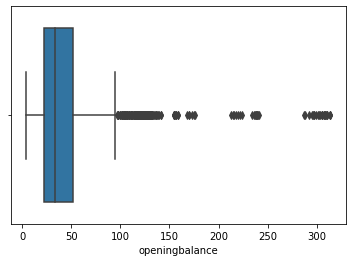

In [485]:
sns.boxplot(df.openingbalance)

Opening balance is right skewed we cannot replace null values with mean and there are many outliers also so will replace with median.

In [486]:
#imputing the values with median
median = df['openingbalance'].median()
df['openingbalance'] = df['openingbalance'].fillna(median)

In [487]:
#will remove all null values in base pay and total sales
df = df.dropna()  #Drop the rows where at least one element is missing.
df.isnull().sum() 

Gender            0
Business          0
Dependancies      0
Calls             0
Type              0
Billing           0
Rating            0
Age               0
Salary            0
Base_pay          0
Bonus             0
Unit_Price        0
Volume            0
openingbalance    0
closingbalance    0
low               0
Unit_Sales        0
Total_Sales       0
Months            0
Education         0
dtype: int64

**Advantages And Disadvantages of Mean/Median Imputation**

**Advantages**

Easy to implement(Robust to outliers)

Faster way to obtain the complete dataset 

**Disadvantages**

Change or Distortion in the original variance

Impacts Correlation

In [488]:
df.nunique() #getting no. of unique values

Gender               2
Business             2
Dependancies         2
Calls                2
Type                 3
Billing              2
Rating               2
Age                 65
Salary            4961
Base_pay          4868
Bonus             4961
Unit_Price        3808
Volume            4793
openingbalance    2964
closingbalance    3982
low               3980
Unit_Sales        1427
Total_Sales       4687
Months              73
Education            4
dtype: int64

In [489]:
df.duplicated(subset= None, keep = 'first') #finding duplicate data

0       False
1       False
2       False
3       False
4       False
        ...  
4987    False
4988    False
4989    False
4990    False
4991    False
Length: 4961, dtype: bool

No Duplicated data found

In [490]:
# Seggregating numerical and categorical data
num_df = df.select_dtypes(exclude='object')
cat_df = df.select_dtypes(include='object')

**Step 2. Check the number of variables that are normally distributed & explain**

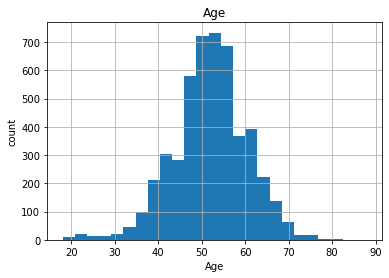

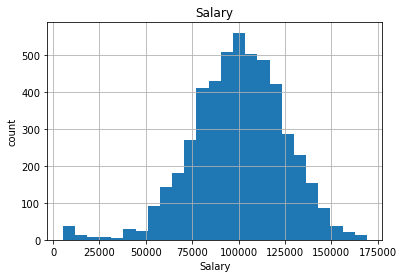

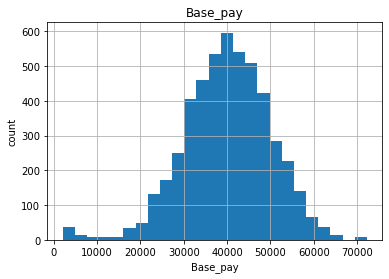

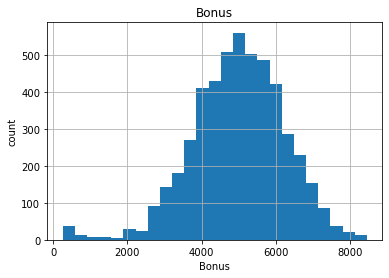

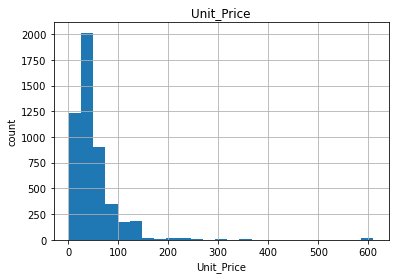

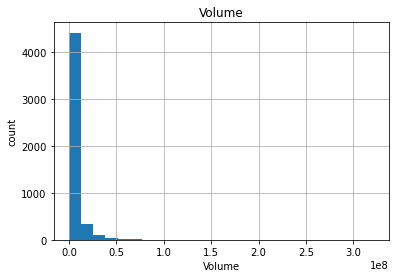

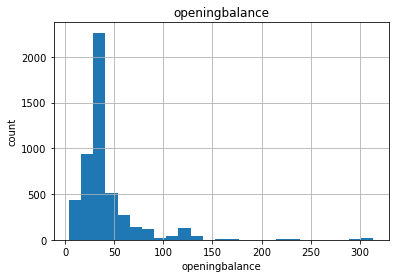

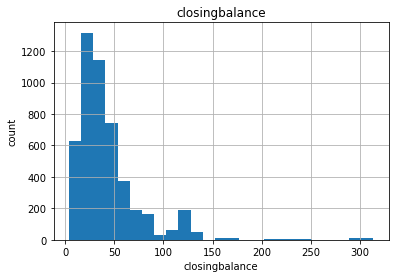

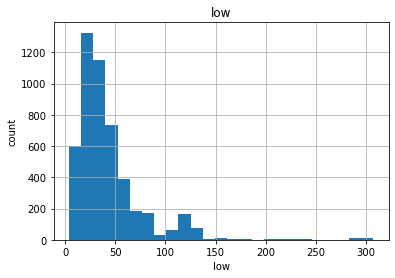

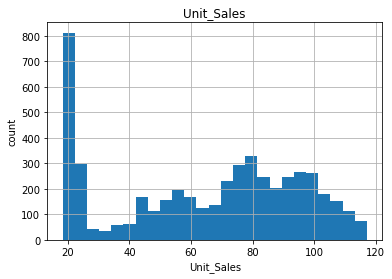

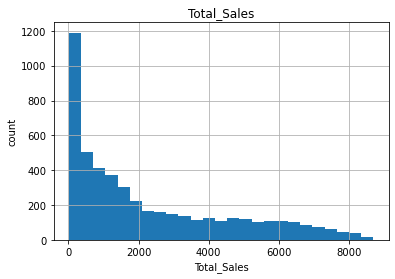

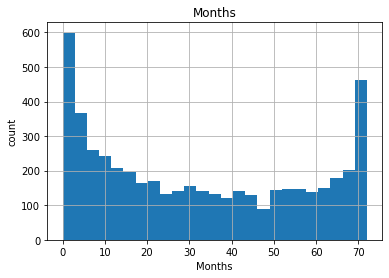

In [491]:
#Histogram plot for each numerical data to find if they are normally distributed or not
for feature in num_df:
    data = num_df
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.title(feature)
    plt.show()

Age, Bonus, Basepay, salary are normally distributed but others are not.

**Step 3. Find out the correlation between variables using spearman rank correlation & explain**

In [492]:
correlation = num_df.corr(method = 'spearman').round(3)
print(correlation)

                  Age  Salary  Base_pay  Bonus  Unit_Price  Volume  \
Age             1.000   0.188     0.188  0.188       0.117  -0.036   
Salary          0.188   1.000     1.000  1.000       0.811  -0.392   
Base_pay        0.188   1.000     1.000  1.000       0.811  -0.392   
Bonus           0.188   1.000     1.000  1.000       0.811  -0.392   
Unit_Price      0.117   0.811     0.811  0.811       1.000  -0.323   
Volume         -0.036  -0.392    -0.392 -0.392      -0.323   1.000   
openingbalance  0.071   0.162     0.162  0.162       0.090  -0.005   
closingbalance  0.432   0.336     0.335  0.336       0.255  -0.146   
low             0.188   1.000     1.000  1.000       0.811  -0.394   
Unit_Sales      0.188   1.000     1.000  1.000       0.811  -0.392   
Total_Sales     0.188   1.000     1.000  1.000       0.811  -0.392   
Months          0.211   0.597     0.597  0.597       0.545  -0.262   

                openingbalance  closingbalance    low  Unit_Sales  \
Age                 

<AxesSubplot:>

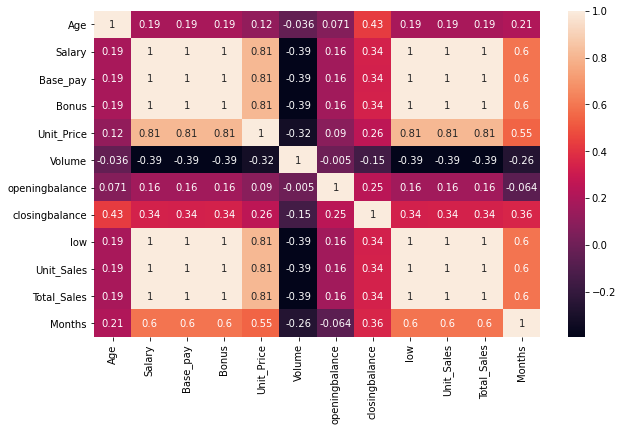

In [493]:
#Visualization of correlation using Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(correlation,annot=True)

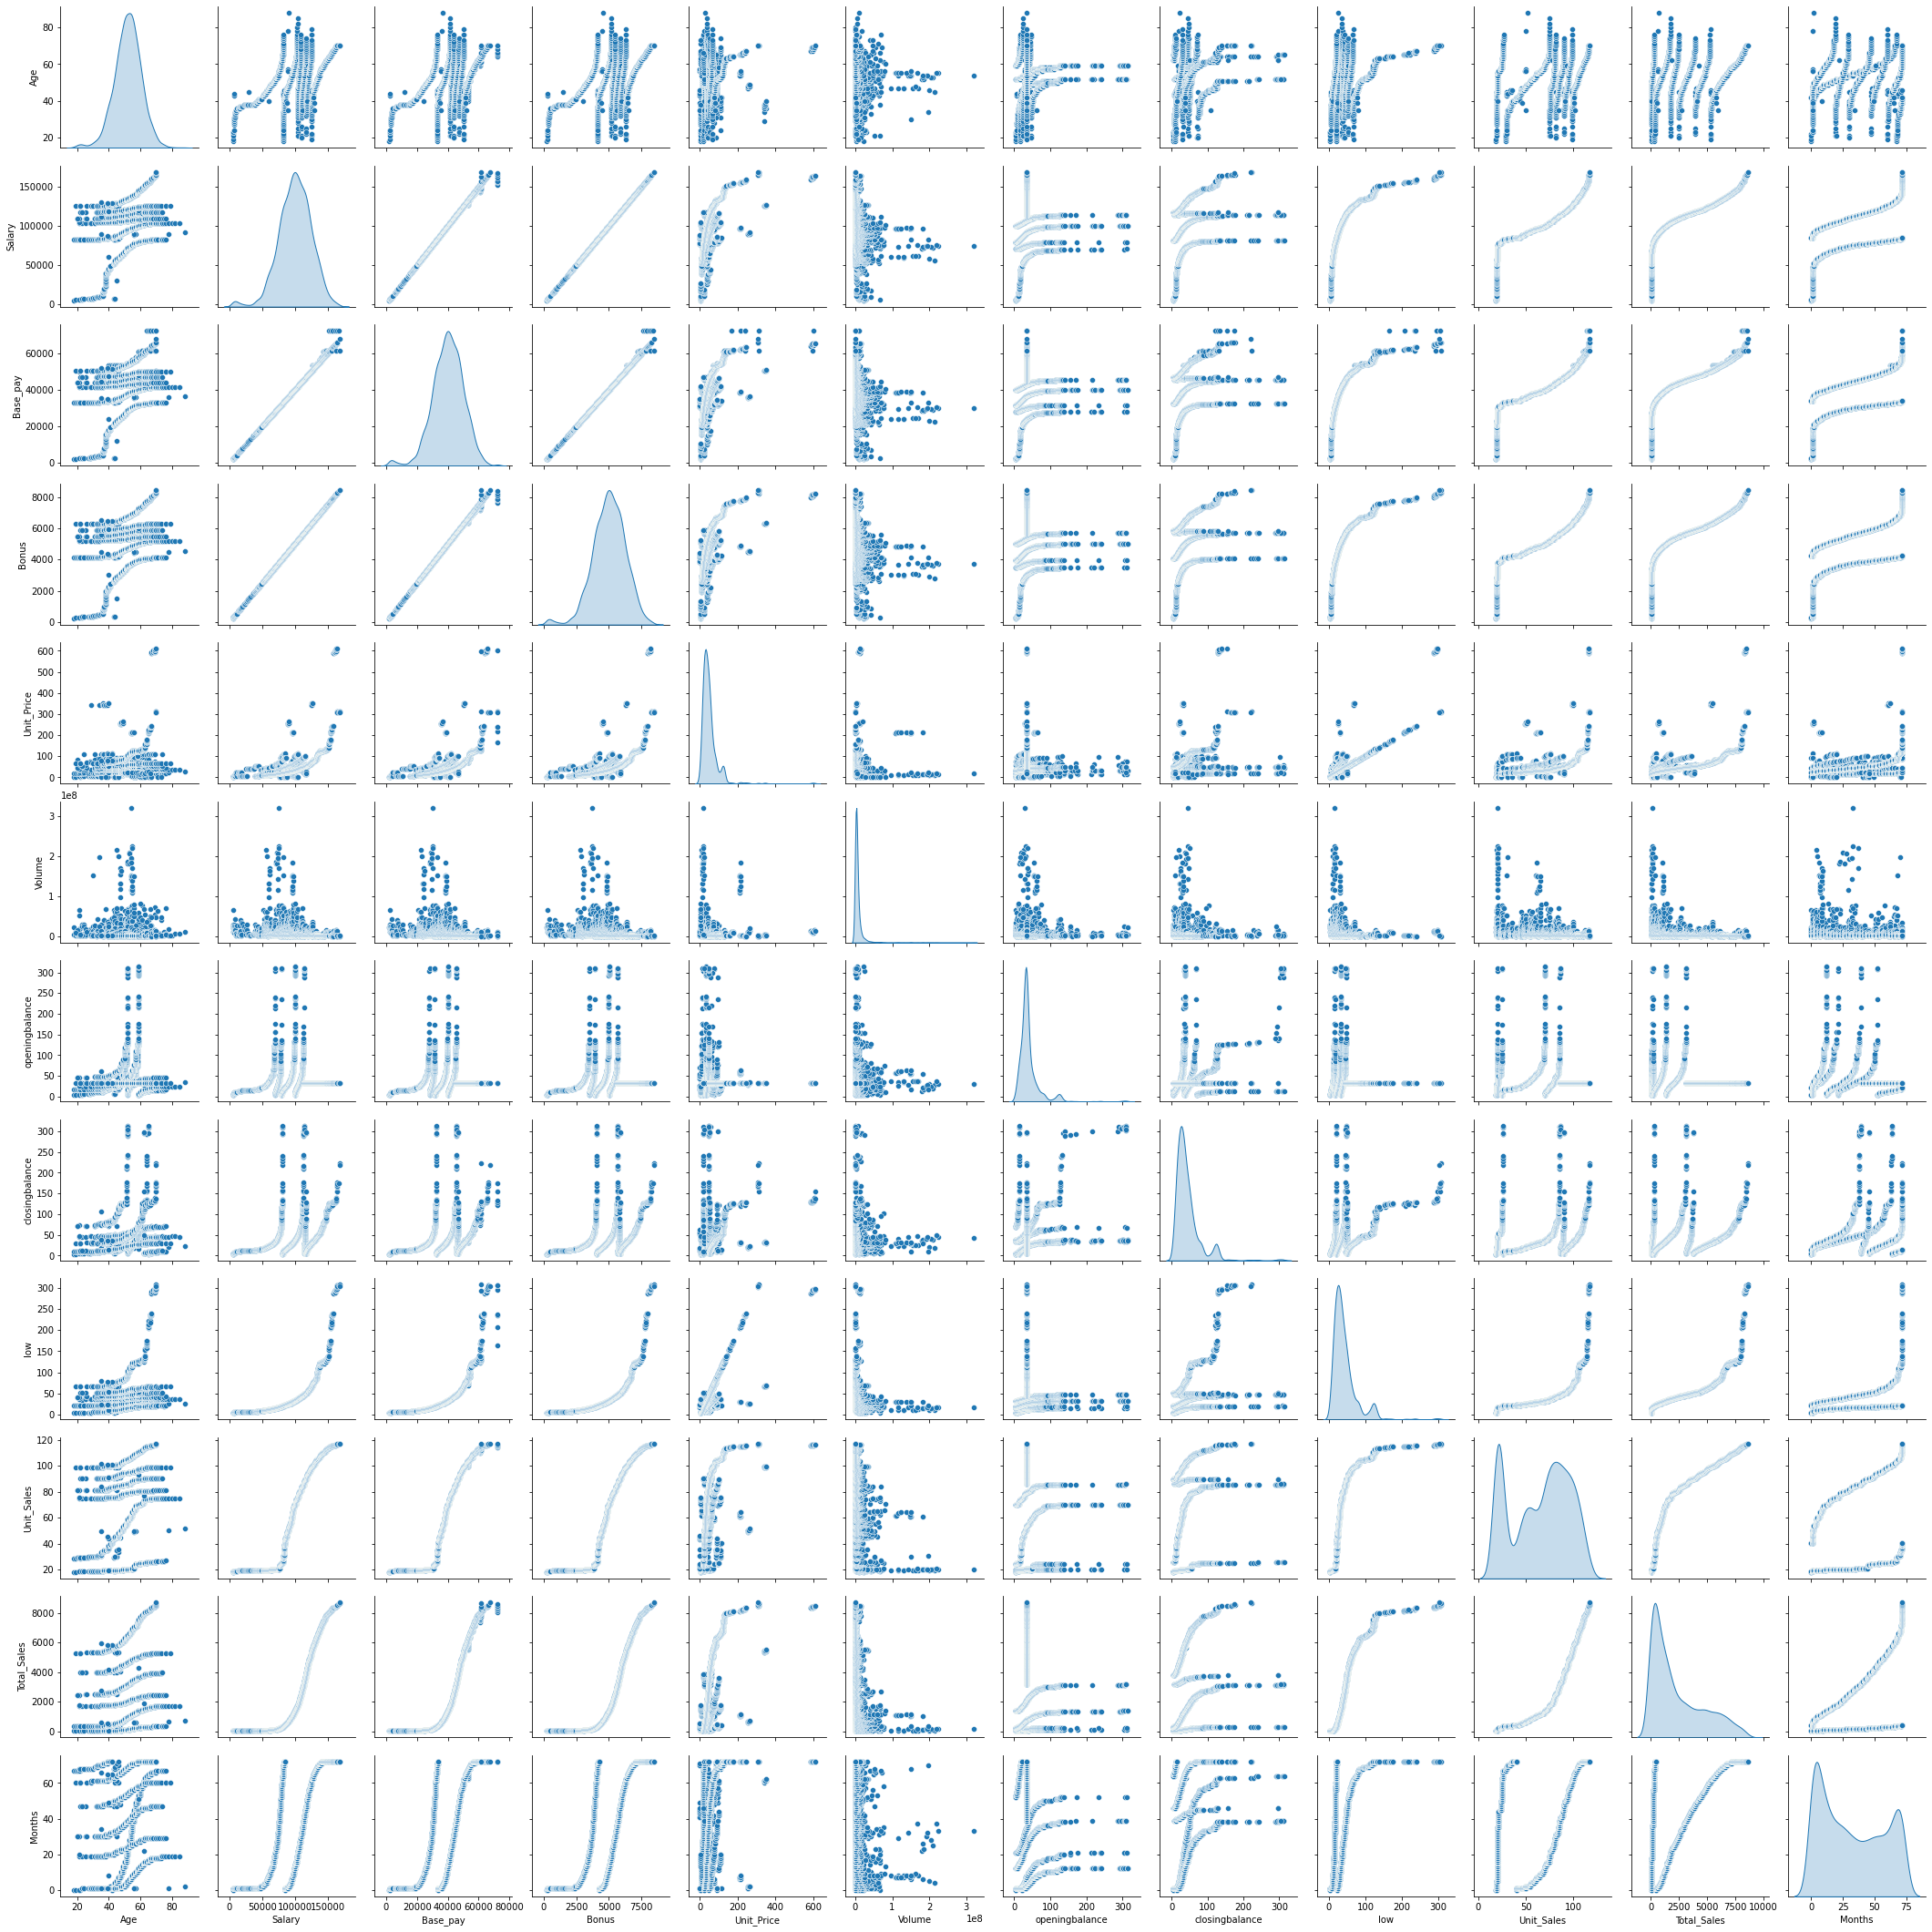

In [494]:
#To test the collinearity 
sns.pairplot(num_df, diag_kind="kde")

From the numerical variable analysis i found that:
1. basepay, bonus, unit sales, low, and total sales are highly correlated which is multicollinearity so we can one of them.
2. month and unit price is moderately correlated with salary we can include that column.
3. basepay, bonus, unit sales, low, and total sales are highly positively correlated with the salary.


**Step 4. Examine the relationship between categorical variables and the dependent variable & explain**


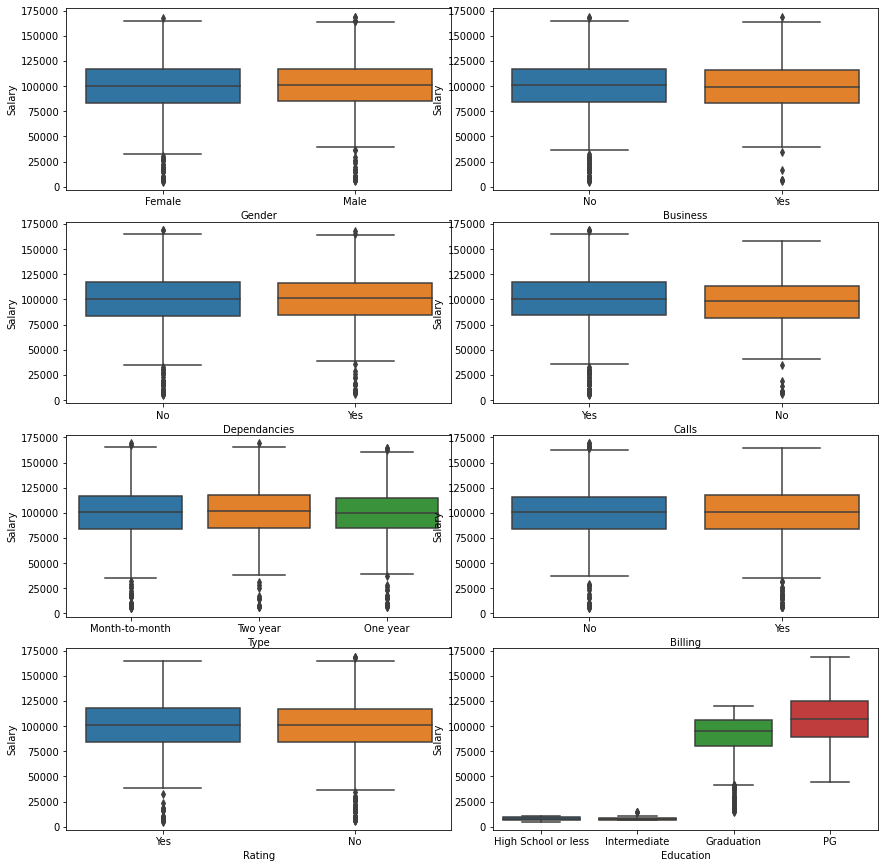

In [495]:
# To Examine the relationship between categorical variables and the dependent variable(Salary),
#Using boxplots for all categorical values with the help of subplots 
fig,((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8))=plt.subplots(4,2,figsize=(12,12))   # Plotting size of figure
fig.tight_layout()                      # Plotting layout of each subplot
sns.boxplot(x = 'Gender', y = 'Salary', data = df,ax=ax1)
sns.boxplot(x = 'Business', y = 'Salary', data = df,ax=ax2)
sns.boxplot(x = 'Dependancies', y = 'Salary', data = df,ax=ax3)
sns.boxplot(x = 'Calls', y = 'Salary', data = df,ax=ax4)
sns.boxplot(x = 'Type', y = 'Salary', data = df,ax=ax5,)
sns.boxplot(x = 'Billing', y = 'Salary', data = df,ax=ax6)
sns.boxplot(x = 'Rating', y = 'Salary', data = df,ax=ax7)
sns.boxplot(x = 'Education', y = 'Salary', data = df,ax=ax8)
plt.show()

Except the Education column we can not see any variabiity in the features and their variable like in Gender male and female are having same salary, if a person has a bussiness or not it doesnt affect his salary, if the person has no. of dependent people in their family or not the salary would be same, if a person can make a call or not the salary would remain same, type of settlement also doesnt get affected, subscribed to billing or not and if he has been rated or not all these would not affect the salary so we can remove them.

In Education we can see people with higher education are paid more.

**Step5. Cleaning and pre-process of the data with other operations required, like, missing values, handling outliers, etc. as and when necessary & explain.**

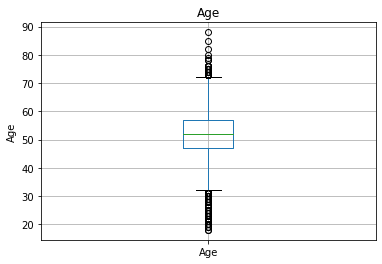

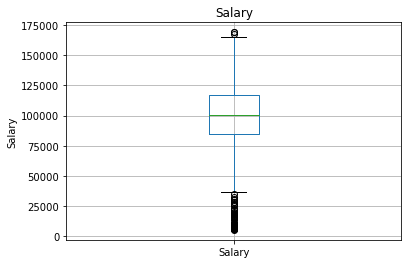

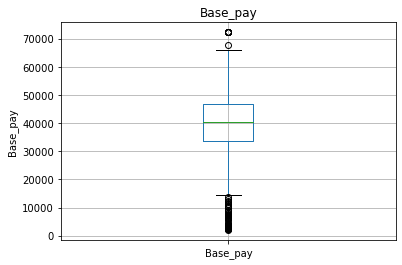

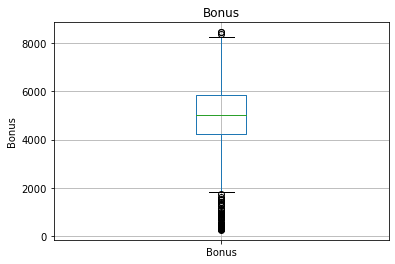

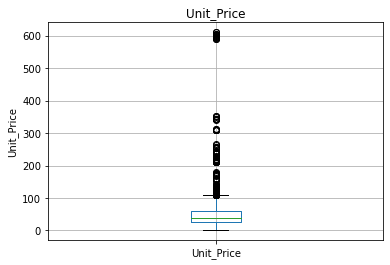

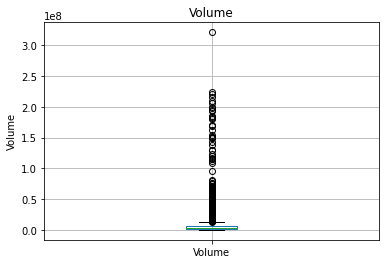

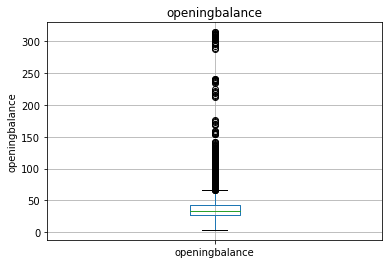

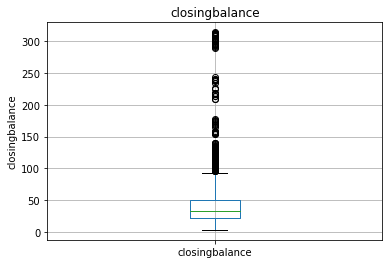

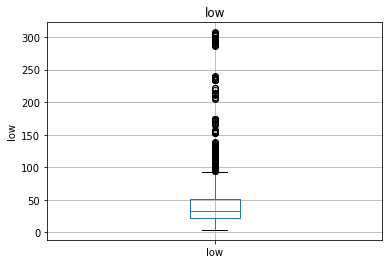

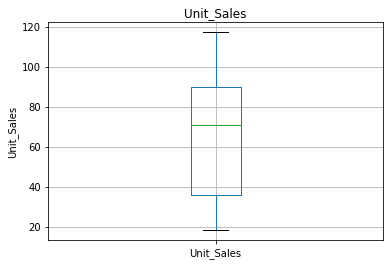

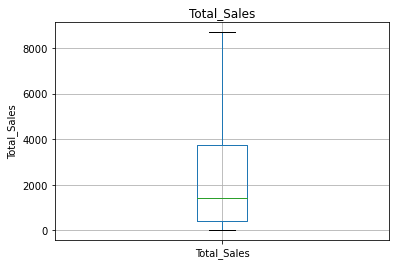

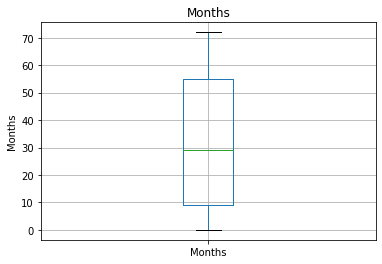

In [496]:
#plotting boxplot to see the outliers
for feature in num_df:
    data = num_df
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

Except for unit sales total sales and months all the other features contains outliers But before we head to remove the outliers we can select the features we need to work on and then remove outliers from them only. 

Now we will choose the features we want to work on on the basis of the correlation operation performed on the numerical features and boxplot analysis done on the categorical features and we are selecting bonus, month and unit prize from numerical features and Education from categorical features.

From our required features as unit prize and bonus are having outliers we will remove the outliers from these features only.

**Treating Outliers**

In [497]:
x=pd.DataFrame(data=df,columns=['Bonus','Unit_Price','Months', 'Education']) #independent variables
y=pd.DataFrame(df['Salary']) #dependent variable

q1=4215.128386 | q2=5033.39159 | q3=5845.589725


<AxesSubplot:xlabel='Bonus'>

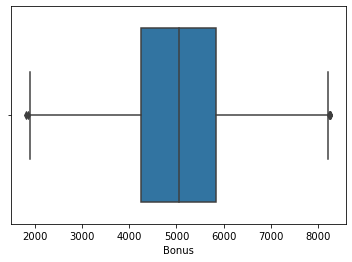

In [498]:
#Handling outliers for bonus,Unit_price,month columns using IQR method
q1=np.quantile(x['Bonus'],0.25)
q2=np.quantile(x['Bonus'],0.50)
q3=np.quantile(x['Bonus'],0.75)
print(f'q1={q1} | q2={q2} | q3={q3}')
IQR=q3-q1
upperwhisker=q3+(1.5*IQR)
lowerwhisker=q1-(1.5*IQR)
x['Bonus']=x['Bonus'][(x['Bonus']>=lowerwhisker) & (x['Bonus']<=upperwhisker)]
x['Bonus'].fillna(float(x['Bonus'].median()), inplace=True)
sns.boxplot(x['Bonus'])

q1=3.2519236789144013 | q2=3.671478964872588 | q3=4.072439743869825


<AxesSubplot:xlabel='Unit_Price'>

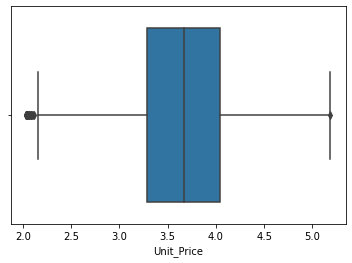

In [499]:
#Unit_price was skewed so first performed the log transformation
x['Unit_Price']=np.log(x['Unit_Price']) 

q1=np.quantile(x['Unit_Price'],0.25)
q2=np.quantile(x['Unit_Price'],0.50)
q3=np.quantile(x['Unit_Price'],0.75)
print(f'q1={q1} | q2={q2} | q3={q3}')
IQR=q3-q1
upperwhisker=q3+(1.5*IQR)
lowerwhisker=q1-(1.5*IQR)
x['Unit_Price']=x['Unit_Price'][(x['Unit_Price']>=lowerwhisker) & (x['Unit_Price']<=upperwhisker)]
x['Unit_Price'].fillna(float(x['Unit_Price'].median()), inplace=True)
sns.boxplot(x['Unit_Price'])

q1=11.342167602838053 | q2=11.519581581794101 | q3=11.669175036297142


<AxesSubplot:xlabel='Salary'>

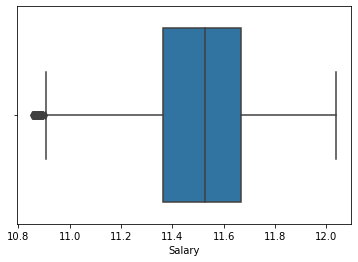

In [500]:
#Salary was skewed so first performed the log transformation
y['Salary']=np.log(y['Salary']) 

q1=np.quantile(y['Salary'],0.25)
q2=np.quantile(y['Salary'],0.50)
q3=np.quantile(y['Salary'],0.75)
print(f'q1={q1} | q2={q2} | q3={q3}')
IQR=q3-q1
upperwhisker=q3+(1.5*IQR)
lowerwhisker=q1-(1.5*IQR)
y['Salary']=y['Salary'][(y['Salary']>=lowerwhisker) & (y['Salary']<=upperwhisker)]
y['Salary'].fillna(float(y['Salary'].median()), inplace=True)
sns.boxplot(y['Salary'])

Now all our independent variables are linearly distributed with the dependent variable and all the variables are normally distributed so there is no restriction for any ML Algorithm while applying.

**Step 6. Apply ML algorithm to the pre-processed columns and find out, which of these algorithms is best suitable for the same & explain**

Label Encoding

In [501]:
#Checking Unique values using .Unique() function.
print(x['Education'].unique()) #Since we are using only one categorical variable.

['High School or less' 'Intermediate' 'Graduation' 'PG']


In [502]:
#Importing Label Encoder
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
x.iloc[:,3]=labelencoder.fit_transform(x.iloc[:,3].values)
print(x['Education'].unique())  #sanity check 
x.head()

[1 2 0 3]


,Bonus,Unit_Price,Months,Education
0,5057.31141,3.672496,0,1
1,5057.31141,3.672496,0,1
2,5057.31141,3.672496,0,1
3,5057.31141,3.672496,0,1
4,5057.31141,3.672496,1,1


Feature scaling

In [503]:
#Importing standardscaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled=sc.fit_transform(x)
print(scaled)

[[ 0.00297657 -0.00365561 -1.31396417 -0.54151624]
 [ 0.00297657 -0.00365561 -1.31396417 -0.54151624]
 [ 0.00297657 -0.00365561 -1.31396417 -0.54151624]
 ...
 [ 0.00297657 -0.00365561  1.61675749  0.82320923]
 [ 0.00297657 -0.00365561  1.61675749  0.82320923]
 [ 0.00297657 -0.00365561  1.61675749  0.82320923]]


### DecisionTreeRegressor

Decision tree is robust to outliers and it can handle data if data is not normally distributed.

In [504]:
from sklearn.tree import DecisionTreeRegressor# import the regressor
from sklearn import metrics   #Importing metrics from sklearn library
from sklearn.metrics import r2_score #Importing r2 score from sklearn library

regressor = DecisionTreeRegressor(max_depth=4) # create a decisionTreeRegressor 

regressor.fit(x_train, y_train)    # fit the regressor with X and Y data

y_pred=regressor.predict(x_train) #prediction of y_train
print(' r2 score for Training :',r2_score(y_train,y_pred)) #print of r2 score for train
print('Mean Absolute Error for Training: ',metrics.mean_absolute_error(y_train,y_pred))#Print MSE value for train
print('Mean Squared Error for Training: ',metrics.mean_squared_error(y_train,y_pred))  #Print MSE value for train
print('Root Mean Squared Error for Training: ',np.sqrt(metrics.mean_squared_error(y_train,y_pred)))  #Print RMSE value for train
print()

y_pred=regressor.predict(x_test) #prediction of y_test
print(' r2 score for Testing :',r2_score(y_test,y_pred))#print of r2 score for test
print('Mean Absolute Error for Testing : ',metrics.mean_absolute_error(y_test,y_pred)) #Print MSE value for test
print('Mean Squared Error for Testing: ',metrics.mean_squared_error(y_test,y_pred)) #Print MSE value for test
print('Root Mean Squared Error for Testing: ',np.sqrt(metrics.mean_squared_error(y_test,y_pred))) #Print RMSE value for test

 r2 score for Training : 0.9865683840706131
Mean Absolute Error for Training:  0.018858060746738108
Mean Squared Error for Training:  0.0006841853285381915
Root Mean Squared Error for Training:  0.02615693652816001

 r2 score for Testing : 0.9862606969623804
Mean Absolute Error for Testing :  0.018834817068373443
Mean Squared Error for Testing:  0.0006981999759707648
Root Mean Squared Error for Testing:  0.02642347395727452


We have used max depth = 4 which can cause overfitting of the model bcos with max depth = 3 we were getting efficiency around 92%.

As the efficiency is good and our error for the testing data is less than the training data error so our model is not over fitted.

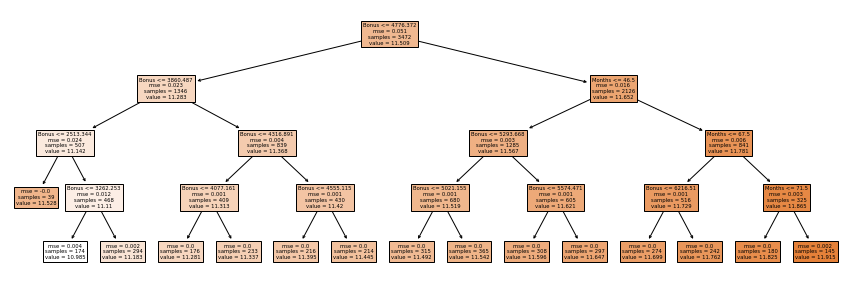

In [505]:
#Importing tree from sklearn library,to display data visalization of DecisiontreeRegressor
from sklearn import tree
plt.figure(figsize=(15,5))
tree.plot_tree(regressor,feature_names=x_train.columns,max_depth=4,filled=True)
plt.show()

Cross validation

In [506]:
#Importing shfflesplit using sklearn library
from sklearn.model_selection import ShuffleSplit
model=DecisionTreeRegressor(max_depth=4)
ssplit=ShuffleSplit(n_splits=10,test_size=0.20) 
from sklearn.model_selection import cross_val_score
results=cross_val_score(model,x,y,cv=ssplit)
print(results)
print(np.mean(results))

[0.98405611 0.98516189 0.98683414 0.9860975  0.98743286 0.98722845
 0.98469741 0.98624152 0.98566234 0.98776103]
0.9861173244861063


our model is 98% efficient.

### Random Forest Regressor

Random Forest is robust to outliers and it can handle data if data is not normally distributed.

In [507]:
# Fitting Random Forest Regression to the dataset

from sklearn.ensemble import RandomForestRegressor # import the regressor
from sklearn import metrics
from sklearn.metrics import r2_score
regressor = RandomForestRegressor(n_estimators =100, random_state = 0)  # create regressor object
regressor.fit(x_train, y_train)   # fit the regressor with x and y data

y_pred=regressor.predict(x_train) #prediction of y_train
print(' r2 score for Training :',r2_score(y_train,y_pred)) #print of r2 score for train
print('Mean Absolute Error for Training: ',metrics.mean_absolute_error(y_train,y_pred))#Print MSE value for train
print('Mean Squared Error for Training: ',metrics.mean_squared_error(y_train,y_pred))  #Print MSE value for train
print('Root Mean Squared Error for Training: ',np.sqrt(metrics.mean_squared_error(y_train,y_pred)))  #Print RMSE value for train
print()

y_pred=regressor.predict(x_test) #prediction of y_test
print(' r2 score for Testing :',r2_score(y_test,y_pred))#print of r2 score for test
print('Mean Absolute Error for Testing : ',metrics.mean_absolute_error(y_test,y_pred)) #Print MSE value for test
print('Mean Squared Error for Testing: ',metrics.mean_squared_error(y_test,y_pred)) #Print MSE value for test
print('Root Mean Squared Error for Testing: ',np.sqrt(metrics.mean_squared_error(y_test,y_pred))) #Print RMSE value for test

 r2 score for Training : 0.9999555287690035
Mean Absolute Error for Training:  0.00011756280628796383
Mean Squared Error for Training:  2.2652943584580303e-06
Root Mean Squared Error for Training:  0.0015050894851994783

 r2 score for Testing : 0.9999537423105544
Mean Absolute Error for Testing :  0.00024286350955089796
Mean Squared Error for Testing:  2.3507100448178453e-06
Root Mean Squared Error for Testing:  0.0015332025452685126


test data error is less than train data so model is not overfitted.

Cross validation

In [508]:
#Repeated Random Test_Train splits cross validation
#Importing KFold from sklearn model
from sklearn.model_selection import ShuffleSplit
model=RandomForestRegressor()
ssplit=ShuffleSplit(n_splits=10,test_size=0.20)
from sklearn.model_selection import cross_val_score
results=cross_val_score(model,x,y,cv=ssplit)
print(results)
print(np.mean(results))

[0.99999815 0.99999789 0.99869887 0.99999803 0.99999812 0.99999814
 0.99981429 0.99999718 0.99992399 0.99999845]
0.999842312113248


Our model is 99% efficient

### Results and Conclusion

we have done all the elementry EDA steps needed and plotted various graphs to determine the correlation among the independent variables and also between the independent and dependent variable. Then on basis of that we selected our most important independent variables.

After feature selection we used two machine learning models and achieved quite good accuracy also. we also checked if our model is overfitted or not.

**Recommendations as an HR analytics**
Salary ishighly affected by the education more educated person is taking more salary,more experienced people are also getting higher salary. and the bonus and unit price are also paid according to the salary.As an HR I can motivate employee to sell more item so they could get more bonus and our sales can also increase.

My learning from this excercise would be that from now on i will first check the correlation between variables and then will do EDA bcos this will save my time in removing null values and outliers from the inimportant columns and also from drawing the plot between the variables which are not going to be used in the final model.

